In [1]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fn = 'karate_club_network_edge_file.edg'

### Load the edge list and visualize the network.

In [3]:
#load
graph = nx.read_weighted_edgelist(fn)

Text(0.5,1,'The Karate Club network')

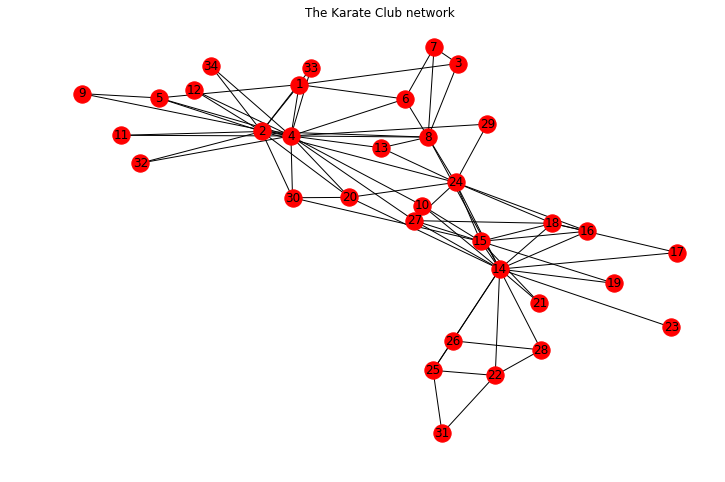

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
nx.draw(graph, with_labels=True)
ax.set_title('The Karate Club network')

https://networkx.github.io/documentation/networkx-1.9/_modules/networkx/classes/function.html

### Calculate the network edge density: 
The edge density of a network is the fraction of edges out of possible edges:
$$D = \frac{2*m}{n(n-1)}$$ 
where $m$ is the number of edges and $N$ is the number of vertices.

Total possible edges is
$\frac{N(N-1)}{2}$ which is $1 + 2 + 3 ... + (N-2) + (N-1)$

The edge density $\rho$ of graph 1 is $\frac{18}{56}$ = 0.321

In [5]:
m = graph.number_of_edges()
n = graph.number_of_nodes()
density = 2*m/(n*(n-1))

print("Edge Density: ", density)

Edge Density:  0.13903743315508021


In [6]:
# use networkx function
nx.density(graph)

0.13903743315508021

### Clustering coefficient

Clustering coefficient defined for node i as the fraction of edges between
its neighbours out of possible edges between its neighbours:

$$c_i = \frac{E_i}{{k_i \choose 2}} = \frac{2E_i}{k_i (k_i - 1)}$$

Here E is the number of edges between i's neighbours.

In [7]:
#example
graph['1']

AtlasView({'4': {'weight': 1.0}, '3': {'weight': 1.0}, '2': {'weight': 1.0}, '6': {'weight': 1.0}, '5': {'weight': 1.0}})

In [8]:
list(graph.neighbors('1'))

['4', '3', '2', '6', '5']

To find clustering coefficient of one node, 
node '1' for example, we can do the following

- Find the neighbours of the node using `graph.neighbors(n)`
- Iterate through all the neighbours and check if each neighbour contains a link with all other neighbours
- To check if there is an edge between 2 vertices, we can use the `Graph.has_edge(u, v)`
- If contain links, `True`, counter +1

In [9]:
node = '1'

n_links = 0
nodes_with_links = []
neighbours = list(graph.neighbors(node))
for neighbour_node in neighbours:
    for other_node in neighbours:
        if graph.has_edge(neighbour_node, other_node):
            n_links += 1
            nodes_with_links.append((neighbour_node, other_node))


print("Edges: ", nodes_with_links)

# we are double counting each link
n_links = n_links/2
print("Number of links between neighbours: ", n_links)

k = len(neighbours)
total_possible_links_between_neighbours = (k * (k - 1))
print("Total possible links between neighbours: ", total_possible_links_between_neighbours)

clustering_coefficient = 2 * n_links / total_possible_links_between_neighbours
print("Clustering Coefficient of node: ", clustering_coefficient)
# regarding double counting, observe that we have the edges ('4', '2') and ('2', '4'), 
# which are the edge since this a undirected graph

Edges:  [('4', '2'), ('4', '6'), ('4', '5'), ('2', '4'), ('2', '5'), ('6', '4'), ('5', '4'), ('5', '2')]
Number of links between neighbours:  4.0
Total possible links between neighbours:  20
Clustering Coefficient of node:  0.4


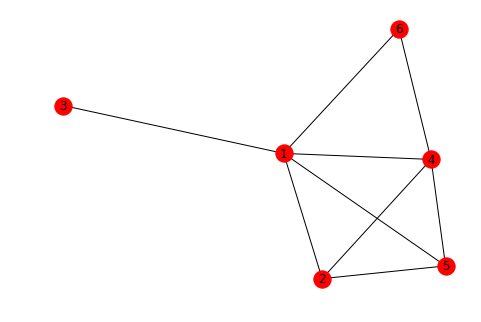

In [10]:
# check the subgraph containing '1' and its neighbours
nx.draw(graph.subgraph(['4', '3', '2', '6', '5', '1']), with_labels=True)

Average Clustering Coefficient

$$\frac{1}{N}\sum_{i}c_i$$

where $N$ is the total number of nodes (vertices) and $c_i$ is the clustering coefficient of node i

In [11]:
# first i create a function to calc the clustering coefficient of a single node
def clustering_coefficient(node):
    n_links = 0
    neighbours = list(graph.neighbors(node))
    k = len(neighbours)
    if k<2:
        return 0
    for neighbour_node in neighbours:
        for other_node in neighbours:
            if graph.has_edge(neighbour_node, other_node):
                n_links += 1
    
    n_links = n_links/2 # double counting

    return 2 * n_links / (k * (k-1))

clustering_coefficient('1')

0.4

In [12]:
# apply function to every single node
all_nodes = list(graph.nodes)
node_ls = {}
for node in all_nodes:
    cc = clustering_coefficient(node)
    node_ls[node] = {"coefficient": cc}

node_ls

{'1': {'coefficient': 0.4},
 '4': {'coefficient': 0.11029411764705882},
 '3': {'coefficient': 0.3333333333333333},
 '2': {'coefficient': 0.19696969696969696},
 '6': {'coefficient': 0.16666666666666666},
 '5': {'coefficient': 0.6666666666666666},
 '8': {'coefficient': 0.2},
 '30': {'coefficient': 0.5},
 '12': {'coefficient': 1.0},
 '33': {'coefficient': 1.0},
 '24': {'coefficient': 0.24444444444444444},
 '20': {'coefficient': 0.5},
 '11': {'coefficient': 1.0},
 '34': {'coefficient': 1.0},
 '32': {'coefficient': 1.0},
 '7': {'coefficient': 0.3333333333333333},
 '10': {'coefficient': 0.3333333333333333},
 '13': {'coefficient': 0.3333333333333333},
 '27': {'coefficient': 0.6},
 '9': {'coefficient': 1.0},
 '29': {'coefficient': 0.0},
 '14': {'coefficient': 0.15},
 '15': {'coefficient': 0.3333333333333333},
 '28': {'coefficient': 0.6666666666666666},
 '19': {'coefficient': 1.0},
 '22': {'coefficient': 0.5},
 '18': {'coefficient': 0.6666666666666666},
 '16': {'coefficient': 1.0},
 '21': {'coe

In [13]:
average_clustering_coefficient = sum([node_ls[node]["coefficient"] for node in node_ls])/ len(node_ls)
print("Average Clustering Coefficient: ",
      average_clustering_coefficient)

Average Clustering Coefficient:  0.5706384782076824


In [14]:
# or you can just use the function from the library
nx.average_clustering(graph)

0.5706384782076824

### Degree
The degree $k_i$ of the vertex (node) $v_i$ is the number of edges it is incident to. (This is number
of neighbours in simple graphs. Loops are counted twice in multigraphs.)

### Average Degree
The average degree $\langle k \rangle$ of a network is: $$\langle k \rangle = \sum_{i}\frac{k_i}{N} = 2m/N$$
where $m$ is the total number of edges in the graph


### Calculate the degree distribution P(k)

The degree distribution P(k) is one of the central concepts in network analysis.
It answers the questions ”if a random node is picked, what is the probability
that its degree is k?”

$$P(k) = \frac{N_k}{N}$$

where $N_K$ is the number of nodes with degree k

In [15]:
# for a particular node in a simple undirected graph, 
# degree is just the number of neighbours
len(list(graph.neighbors('1')))

5

In [16]:
all_nodes = list(graph.nodes)
for node in all_nodes:
    degree = len(list(graph.neighbors(node)))
    if node in node_ls:     
        node_ls[node].update({"degree": degree})

In [17]:
all_degree = [node_ls[node]["degree"] for node in node_ls]

degree_count = {}

for degree in all_degree:
    if degree not in degree_count:
        degree_count[degree] = 1
    else:
        degree_count[degree] += 1
        
degree_count

{5: 3, 17: 1, 3: 6, 12: 1, 4: 6, 6: 2, 2: 11, 10: 1, 16: 1, 9: 1, 1: 1}

In [18]:
dd = {}
for key in degree_count.keys():
    dd[key] = round(degree_count[key]/34,3)
    
for d in sorted(dd):
    print((d, dd[d]))

(1, 0.029)
(2, 0.324)
(3, 0.176)
(4, 0.176)
(5, 0.088)
(6, 0.059)
(9, 0.029)
(10, 0.029)
(12, 0.029)
(16, 0.029)
(17, 0.029)


In [19]:
items = sorted(degree_count.items())
items

[(1, 1),
 (2, 11),
 (3, 6),
 (4, 6),
 (5, 3),
 (6, 2),
 (9, 1),
 (10, 1),
 (12, 1),
 (16, 1),
 (17, 1)]

Text(0,0.5,'Count')

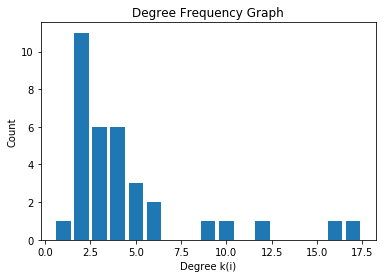

In [23]:
x,y = zip(*items)
plt.bar(x,y)
plt.title("Degree Frequency Graph")
plt.xlabel("Degree k(i)")
plt.ylabel("Count")

Text(0,0.5,'Distribution')

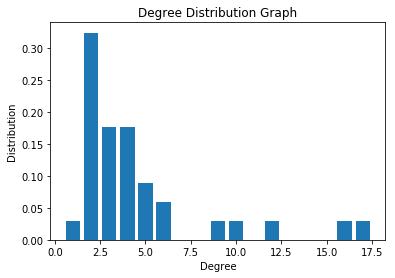

In [24]:
len(graph.nodes)
degree_distribution = [degree/graph.number_of_nodes() for degree in y]
plt.bar(x,degree_distribution)
plt.title("Degree Distribution Graph")
plt.xlabel("Degree")
plt.ylabel("Distribution")

### The complementary cumulative degree distribution 1-CDF(k) of the network.

ccdd

Text(0,0.5,'Cumulative Distribution')

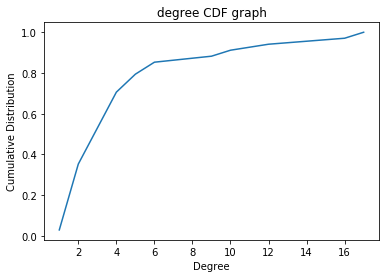

In [26]:
CDF = []

total = 0
for pdf in degree_distribution:
    total += pdf
    CDF.append(total)
    
plt.plot(x,CDF)
plt.title("degree CDF graph")
plt.xlabel("Degree")
plt.ylabel("Cumulative Distribution")

Text(0,0.5,'Complementary CDF')

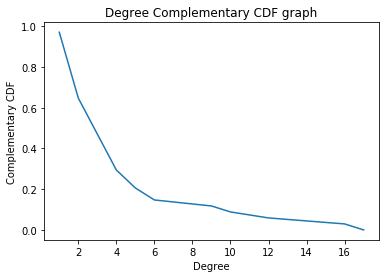

In [27]:
ccdd = [1-cdf for cdf in CDF]

plt.plot(x,ccdd)
plt.title("Degree Complementary CDF graph")
plt.xlabel("Degree")
plt.ylabel("Complementary CDF")

### Average shortest path length

```networkx.average_shortest_path_length(G, weight=None)```

Return the average shortest path length.

The average shortest path length is $$\sum_{s,t \in V} \frac{d(s,t)}{n(n-1)}$$

where $V$ is the set of nodes in $G$, $d(s, t)$ is the shortest path from $s$ to $t$, and $n$ is the number of nodes in $G$.

In [52]:
length = nx.average_shortest_path_length(graph)
print("Average shortest path length: ", length)

Average shortest path length:  2.408199643493761


###  Create a scatter plot of $Ci$ as a function of $ki$.

where $Ci$ is clustering coefficient and $ki$ is degree

Text(0.5,1,'Clustering coefficient vs degree')

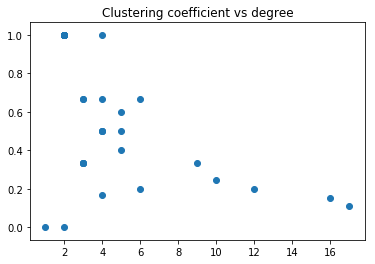

In [55]:
plt.scatter(
    x=[node_ls[node]["degree"] for node in node_ls],
    y=[node_ls[node]["coefficient"] for node in node_ls]
)
plt.title("Clustering coefficient vs degree")